In [102]:
from sklearn.preprocessing import OneHotEncoder
from flask import Flask,render_template,request
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats import zscore
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
from sklearn.metrics import mean_absolute_error


In [167]:
def posix_time(dt):
    return (dt-datetime(1970,1,1))/timedelta(seconds=1)

In [179]:
#importing the dataset
data=pd.read_csv("Train.csv")

In [180]:
data.shape

(33750, 15)

In [181]:

data.loc[data["is_holiday"]!='None','is_holiday']=1
data.loc[data["is_holiday"]=='None','is_holiday']=0
data["is_holiday"]=data["is_holiday"].astype(int)

data.shape



(33750, 15)

In [182]:
data["date_time"]=pd.to_datetime(data["date_time"])
data["hour"]=data["date_time"].map(lambda x: int (x.strftime("%H")))
data["month_day"]=data["date_time"].map(lambda x: int (x.strftime("%d")))
data["weekday"]=data["date_time"].map(lambda x: x.weekday()+1)
data["month"]=data["date_time"].map(lambda x: int (x.strftime("%m")))
data["year"]=data["date_time"].map(lambda x: int (x.strftime("%Y")))
data.to_csv("traffic_volume_data1.csv",index=None)



In [183]:
data.shape


(33750, 20)

In [184]:

sns.set()
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False
warnings.filterwarnings("ignore")
data=pd.read_csv("traffic_volume_data1.csv")
data=data.sample(9994).reset_index(drop=True)
label_columns=["weather_type","weather_description"]
numeric_columns=["is_holiday","temperature","weekday","hour","month_day","year","month"]


In [185]:
features=numeric_columns+label_columns
x=data[features]
x.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,285.48,3,5,29,2016,6,Mist,mist
1,0,287.23,6,4,5,2013,10,Clouds,overcast clouds
2,0,290.97,4,2,26,2016,5,Thunderstorm,proximity thunderstorm
3,0,288.93,1,23,23,2013,9,Clear,Sky is Clear
4,0,277.99,5,9,13,2016,5,Drizzle,light intensity drizzle


In [186]:
x['weather_description']

0                          mist
1               overcast clouds
2        proximity thunderstorm
3                  Sky is Clear
4       light intensity drizzle
                 ...           
9989               sky is clear
9990               sky is clear
9991               sky is clear
9992            overcast clouds
9993               sky is clear
Name: weather_description, Length: 9994, dtype: object

In [187]:


data["traffic_volume"].shape


(9994,)

(9994, 9)
(9994, 1)


In [218]:
data.loc[ data["weather_type"]=='Clear','weather_type']=1
data.loc[data["weather_type"]=='Clouds','weather_type']=2
data.loc[ data["weather_type"]=='Snow','weather_type']=3
data.loc[data["weather_type"]=='Haze','weather_type']=4
data.loc[ data["weather_type"]=='Mist','weather_type']=5
data.loc[data["weather_type"]=='Fog','weather_type']=6
data.loc[ data["weather_type"]=='Drizzle','weather_type']=7
data.loc[data["weather_type"]=='Rain','weather_type']=8
data.loc[ data["weather_type"]=='Thunderstorm','weather_type']=9
data.loc[data["weather_type"]=='Squall','weather_type']=10
data.loc[ data["weather_type"]=='Smoke','weather_type']=11

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


[[<Axes: title={'center': 'is_holiday'}>
  <Axes: title={'center': 'temperature'}>
  <Axes: title={'center': 'weekday'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'month_day'}>
  <Axes: title={'center': 'year'}>]
 [<Axes: title={'center': 'month'}> <Axes: > <Axes: >]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

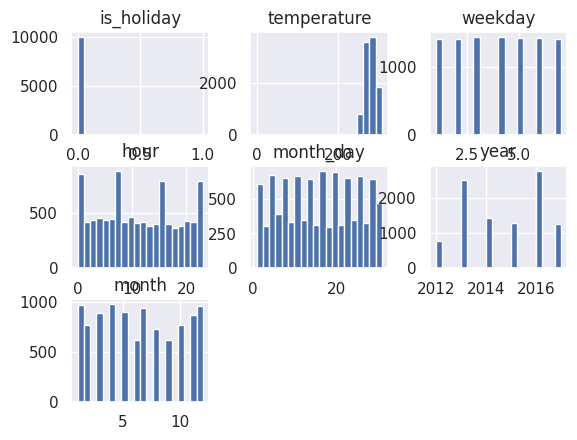

In [221]:
print(data[features].hist(bins=20,))

In [222]:
# features scaling

x_scaler=MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler=MinMaxScaler()
y=y_scaler.fit_transform(y).flatten()
warnings.filterwarnings("ignore")

In [223]:
print(X.shape)
print(X)
type(X)
print(y.shape)
X.shape

(33744, 9)
[[0.         0.84849468 0.16666667 ... 0.         0.         0.        ]
 [0.         0.84521801 0.16666667 ... 0.         0.1        0.02702703]
 [0.         0.84080587 0.16666667 ... 0.         0.1        0.02702703]
 ...
 [0.         0.94004672 0.66666667 ... 0.72727273 0.7        0.35135135]
 [0.         0.94037114 0.66666667 ... 0.72727273 0.7        0.37837838]
 [0.         0.94419933 0.66666667 ... 0.72727273 0.1        0.05405405]]
(9994,)


(33744, 9)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

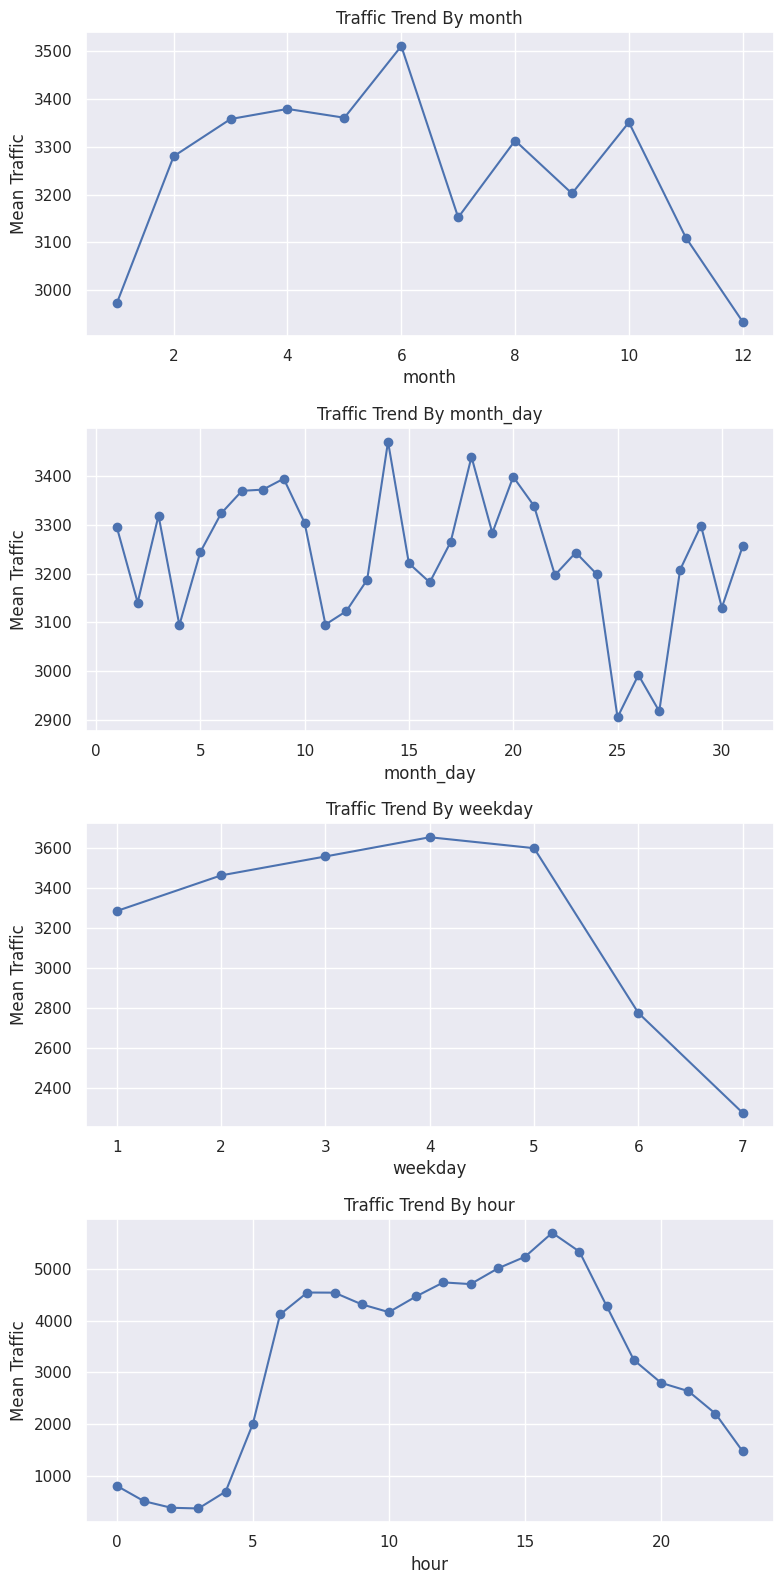

In [224]:
#VISU

metrics=["month","month_day","weekday","hour"]
fig=plt.figure(figsize=(8,4*len(metrics)))
for i, metric in enumerate(metrics):
    ax=fig.add_subplot(len(metrics),1,i+1)
    ax.plot(data.groupby(metric)["traffic_volume"].mean(),'-o')
    ax.set_xlabel(metric)
    ax.set_ylabel("Mean Traffic")
    ax.set_title(f"Traffic Trend By {metric}")

plt.tight_layout()    
plt.show()

In [148]:
y.shape

(9994,)

In [227]:
#Train the model

regre=MLPRegressor(random_state=1,max_iter=500).fit(x,y)
new=[]
print("Predicted OutPut = ",regre.predict(x[:10]))
print("Actual OutPut =", y[:10])

Predicted OutPut =  [0.56261869 0.48300591 0.5065609  0.86730736 0.5627647  0.43313391
 0.64510155 0.69915917 0.55304733 0.61630573]
Actual OutPut = [0.4078857  0.0601731  0.04121445 0.13628246 0.70064569 0.04794615
 0.81989284 0.90136008 0.06649265 0.70545405]


In [228]:
#Error Rev

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.2)
y_pred=regre.predict(testX)
print("mean absolute error = ",mean_absolute_error(testY,y_pred))
print(trainX.shape)

mean absolute error =  0.25408404842503607
(7995, 9)


In [229]:
print(features)

['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month', 'weather_type', 'weather_description']


In [243]:
data.head(5)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,hour,month_day,weekday,month,year
0,2016-06-29 05:00:00,0,97,44,6,310,7,7,285.48,0.00,0.0,1,5,9,2970,5,29,3,6,2016
1,2013-10-05 04:00:00,0,215,74,2,301,8,8,287.23,0.00,0.0,90,2,5,439,4,5,6,10,2013
2,2016-05-26 02:00:00,0,267,75,3,124,3,3,290.97,1.52,0.0,90,9,20,301,2,26,4,5,2016
3,2013-09-23 23:00:00,0,97,94,5,129,6,6,288.93,0.00,0.0,0,1,17,993,23,23,1,9,2013
4,2016-05-13 09:00:00,0,111,60,5,44,6,6,277.99,1.69,0.0,90,7,13,5101,9,13,5,5,2016


In [239]:
#USER INPUT

ip=[]
ip=x_scaler.transform([ip])
out=regre.predict(ip)
print("before inverse scaling = ",out)

before inverse scaling =  [0.56261869]


In [240]:
y_pred=y_scaler.inverse_transform([out])
print("traffic volume = ",y_pred)

traffic volume =  [[4096.30141896]]


In [238]:
if (y_pred<=1000):
    print("No Traffic")
elif(y_pred>1000 and y_pred<=3000):
    print("Busy or Normal flow")    
elif(y_pred>3000 and y_pred<5500):
    print("Heavy Traffic")    
else:
    print("Worst Case")    

Heavy Traffic
